# Classificação usando atribultos + corpus

Nesta seção vamos apresentar os resultados obtidos através de classificadores treinados usando os atributos categoricos e o corpus, sendo este último produzido através do método tfidf.
Os algoritmos testados e seus principais hiperparâmetros serão definidos a seguir.

### SVMub

SVM com kernel linear para dados desbalanceados. Esta técnica permite definir um hiperparâmetro $C$ diferente para cada uma das classes. Uma vez que $C$ alto indica a intenção de não errar a classificação das amostras de treino, enquanto um $C$ baixo aumenta a relevancia de se encontrar uma grande margem de separação, podemos atribuir um $C$ maior para uma das classes tentando reduzir os falso negativos desta, mesmo que isso gere uma menor acuracia (quando considerado todo o dataset). Uma vez que recusar o exame de um paciente que deveria faze-lo pode ter um custo exorbitante, aqui daremos a classe <b>aprovada</b> um peso maior.

Atribuimos $C=1$ para a classe <b>recusada</b> e $C=100$ para a classe <b>aprovada</b>.

### naiveBayes

Algoritmo Naive Bayes com função likelyhood gaussiana.

### SVM

SVM com kernel linear.

### SVM_rbf

SVM com kernel RBF.

## KNN

KNN com k = 10.

## Métricas de avaliação

Aqui consideraremos duas métricas: acurácia e falso positivo.
Na modelagem da saída feita pela biblioteca, o resultado <b>aprovado</b> é representado pelo valor $0$ e o <b>reprovado</b> pelo valor 1. Assim, falso positivo indica que uma amostra que deveria ter sido aprovada e foi recusada, o que significa o pior caso. Assim, avaliaremos o desempenho geral através da acurácia e o desempenho específico do pior caso através dos falsos positivos

In [3]:
#encoding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print("Loading Results...")
data = pd.read_csv('./resources/results_v1.csv', sep="\t")
classifiers_name = ('SVM_ub', 'KNN', 'SVM', 'SVM_RBF', 'N. Bayes')
columns_name = ('TN', 'FP', 'FN', 'TP', 'ACC')
print("done.")

Loading Results...
done.


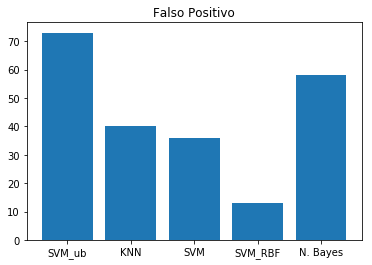

In [7]:
fp = data.iloc[:,1]
y_pos = np.arange(len(classifiers_name))

plt.title('Falso Positivo')
plt.bar(y_pos, fp)
plt.xticks(y_pos, classifiers_name)
plt.show()

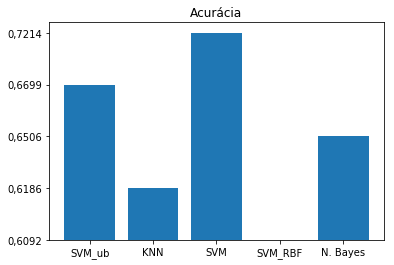

In [8]:
acc = data.iloc[:,4]
y_pos = np.arange(len(classifiers_name))

plt.title('Acurácia')
plt.bar(y_pos, acc)
plt.xticks(y_pos, classifiers_name)
plt.show()